<a href="https://colab.research.google.com/github/jtndr26/Heart-Disease-Predcition/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction

---
Contributor: Jeetendra Harsikumar Sarpe


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing essential libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Importing and understanding our dataset

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Feynn_Labs/Project 3/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Let's understand our columns better**

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure",
        " serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved",
        "exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment",
        "number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


**Checking correlation between columns**

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [ ]:
dataset["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

## Exploratory Data Analysis (EDA)
### First, analysing the target variable:

1    165
0    138
Name: target, dtype: int64


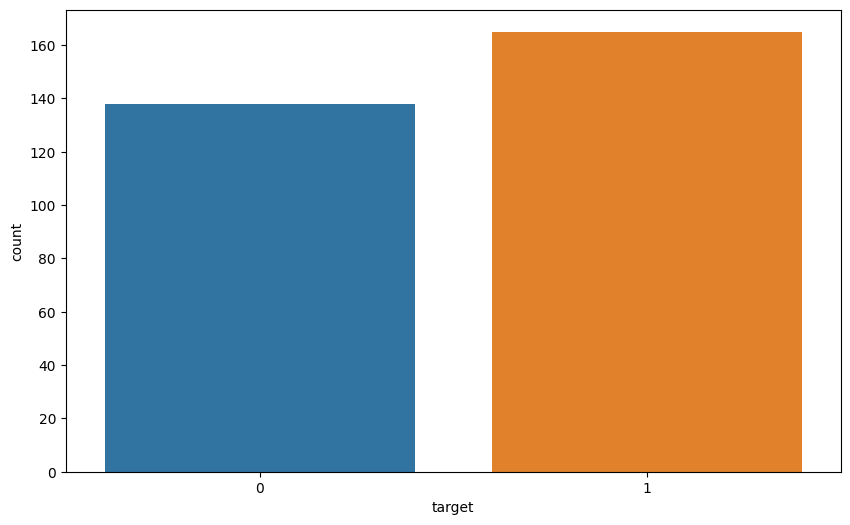

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(data = dataset,x = "target")
target_temp = dataset.target.value_counts()
print(target_temp)
plt.show()

In [ ]:
countNoDisease = len(dataset[dataset.target == 0])
countHaveDisease = len(dataset[dataset.target == 1])
print(countNoDisease)
print(countHaveDisease)

138
165


In [ ]:
y = dataset['target']
print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

Percentage of patience with heart problems: 54.45544554455446
Percentage of patience with heart problems: 45.54455445544554


We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
num_cols = [x for x in dataset.columns if dataset[x].nunique()>5]
cat_cols = [x for x in dataset.iloc[:,:-1].columns if dataset[x].nunique()<=5]
print(num_cols)
print(cat_cols)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


## Bivariate Analysis

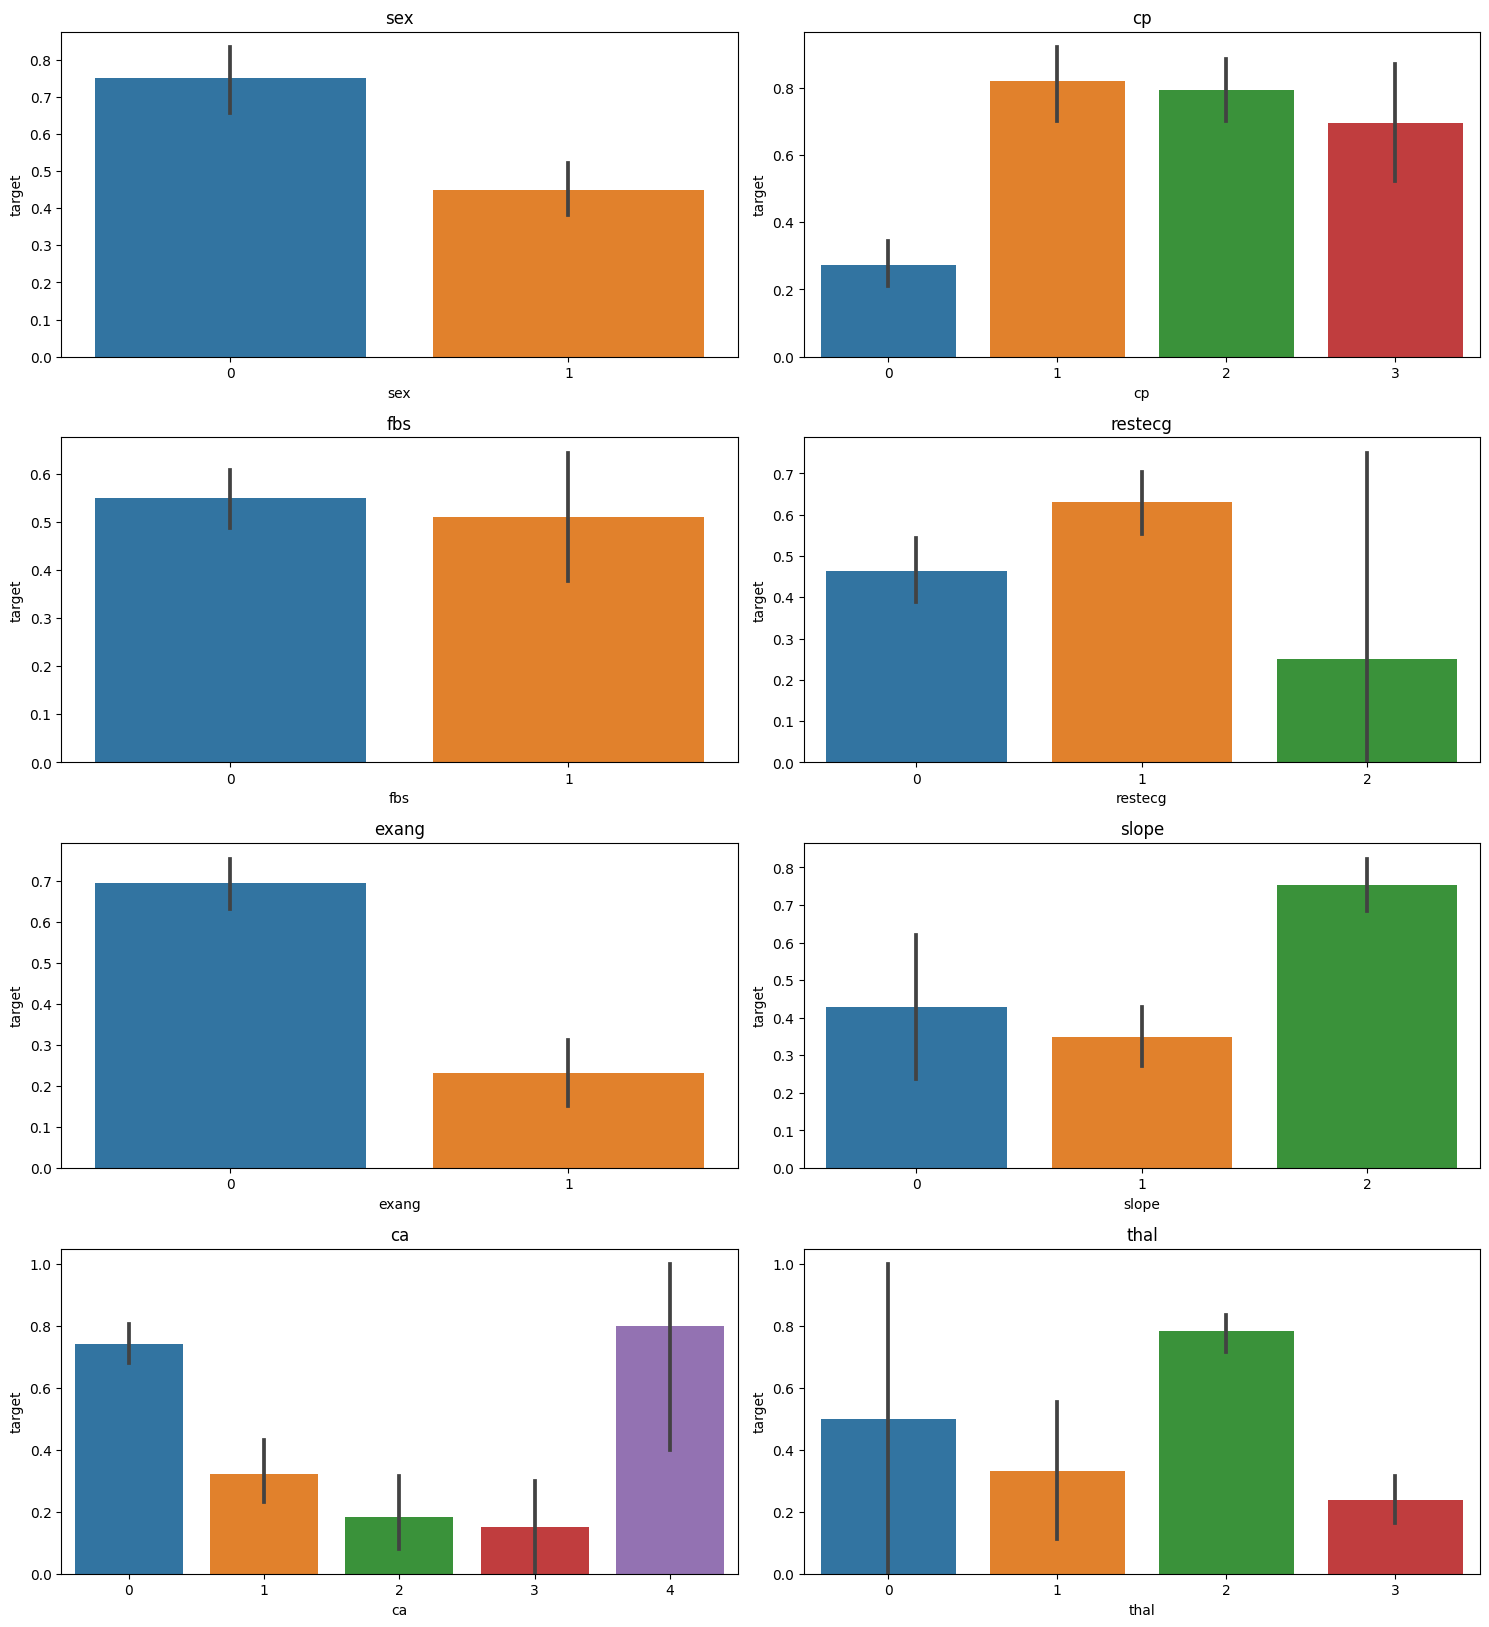

In [ ]:
plt.figure(figsize = (15,20))
for i in range(len(cat_cols)):
  plt.subplot(len(cat_cols)//2+1,2,i+1)
  sns.barplot(data = dataset,x = cat_cols[i],y = 'target')
  plt.title(cat_cols[i])
  plt.subplots_adjust(left= 1, bottom=3, right=2, top=4, wspace=0.3, hspace=0.2)
plt.tight_layout()
plt.show()

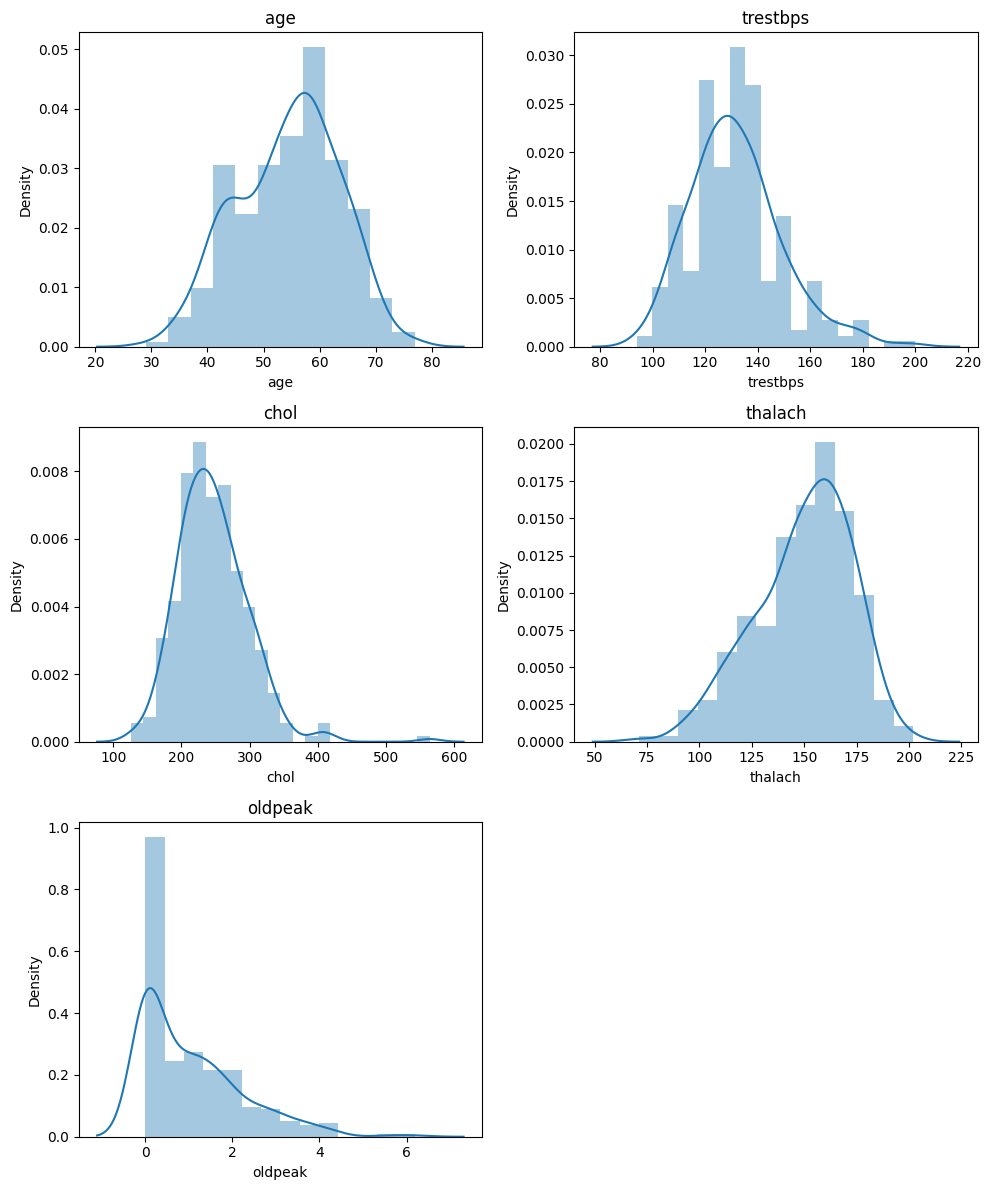

In [ ]:
plt.figure(figsize = (10,12))
for i in range(len(num_cols)):
  plt.subplot(len(num_cols)//2+1,2,i+1)
  sns.distplot(dataset[num_cols[i]])
  plt.title(num_cols[i])
  plt.subplots_adjust(left= 2, bottom=2, right=3, top=3, wspace=0.3, hspace=0.2)
plt.tight_layout()
plt.show()

## Multi Variate Analysis

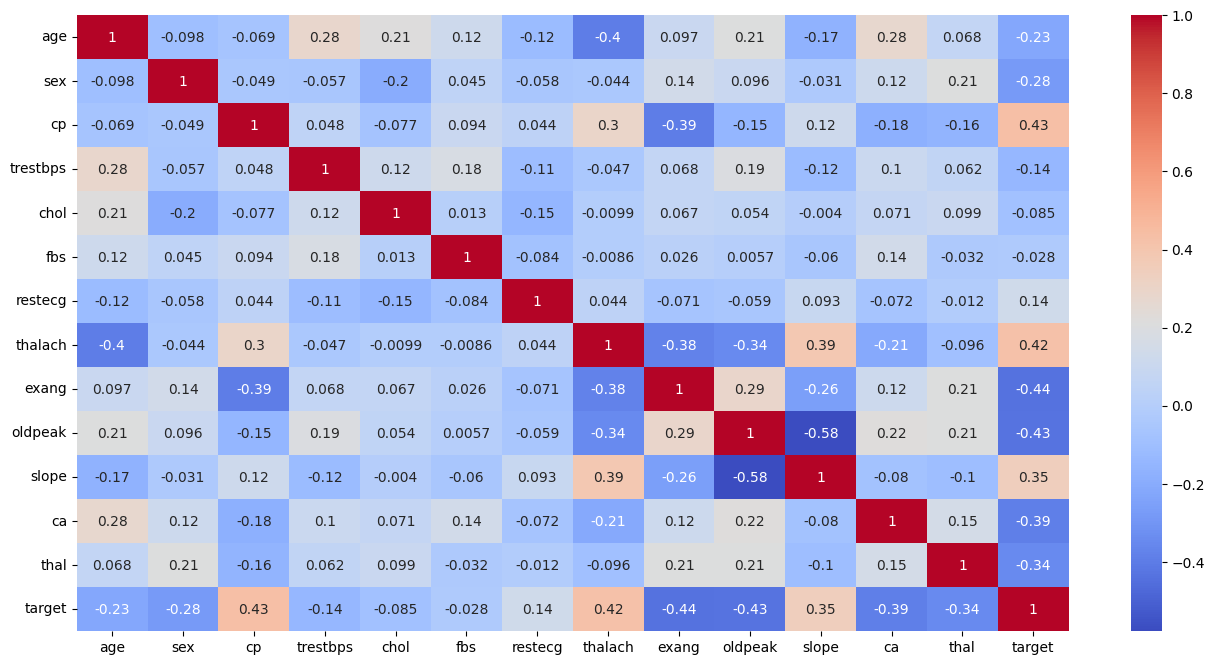

In [ ]:
plt.figure(figsize = (16,8))
sns.heatmap(dataset.corr(),annot = True,cmap = 'coolwarm')
plt.show()

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.shape,X_test.shape

((242, 13), (61, 13))

## Model Fitting
### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### SVM

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


## Output final score

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %


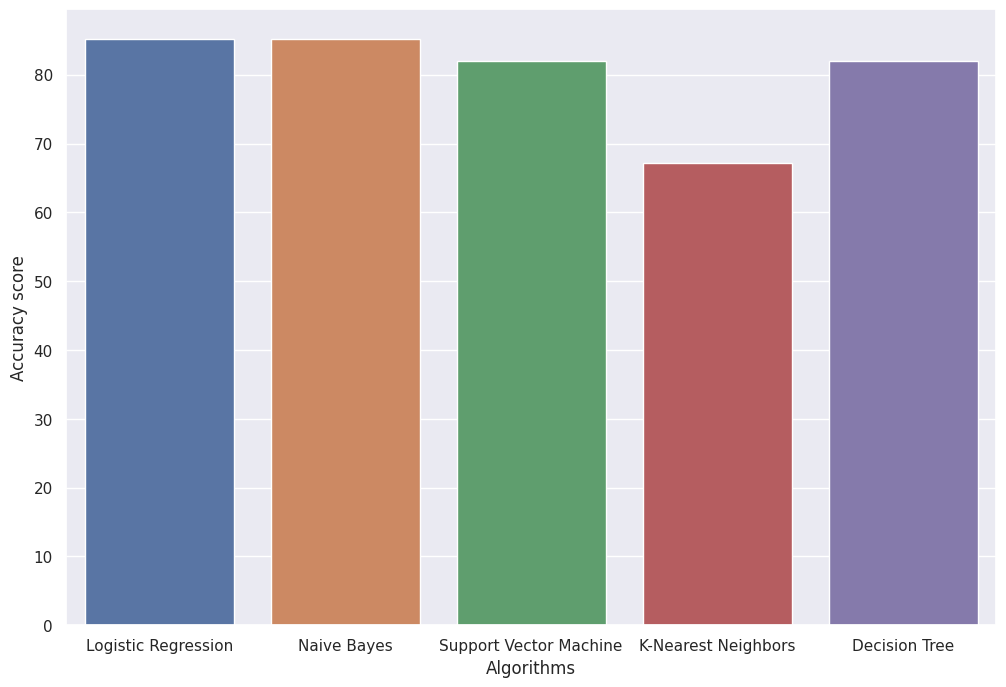

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x = algorithms,y = scores)
plt.show()

### Evaluating the performance of the trained model-Logistic Regression

In [ ]:
# Get the predicted probabilities
train_preds = lr.predict_proba(X_train)[:,1]
test_preds = lr.predict_proba(X_test)[:,1]

In [ ]:
# Get the predicted classes
train_class_preds = lr.predict(X_train)
test_class_preds = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,Y_train)
test_accuracy = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8347107438016529
The accuracy on test data is  0.8524590163934426


[[ 85  26]
 [ 14 117]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

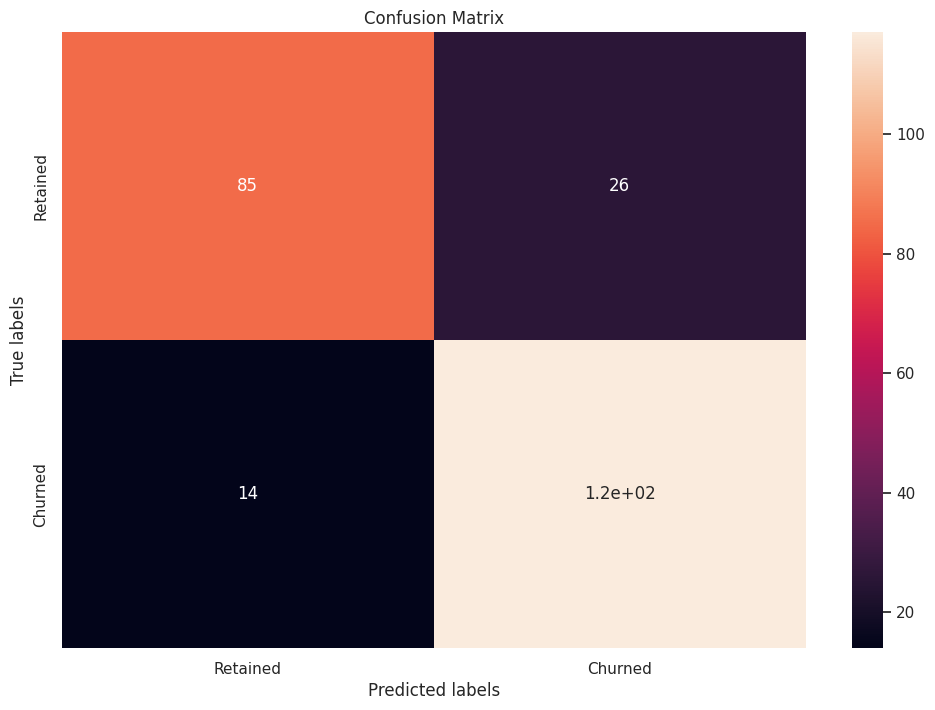

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(Y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[22  5]
 [ 4 30]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

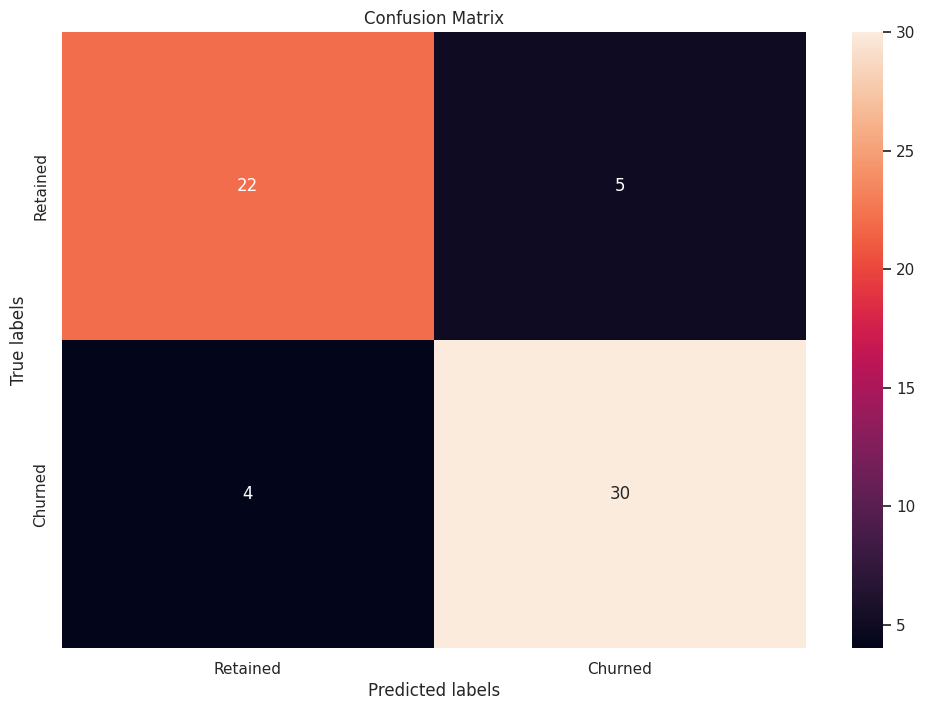

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(Y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Implementing Cross-validated Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = [{'penalty':['l1','l2','elasticnet','none'],
          'C':np.logspace(-4,4,20),
          'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
          'max_iter':[100,500,1000,5000]
}]

In [ ]:
logmodel = LogisticRegression()
gridclf = GridSearchCV(logmodel,param_grid = params,cv = 5,verbose = True,n_jobs = -1)
bestfit = gridclf.fit(X_train,Y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


In [ ]:
bestfit.best_estimator_

LogisticRegression(C=1.623776739188721, solver='liblinear')

In [ ]:
bestfit.score(X_train,Y_train)

0.8429752066115702

In [ ]:
log_cv = LogisticRegression(C=1.623776739188721, solver='liblinear')
clfcv = log_cv.fit(X_train,Y_train)

In [ ]:
traincv_preds = clfcv.predict_proba(X_train)[:,1]
testcv_preds = clfcv.predict_proba(X_test)[:,1]

In [ ]:
traincv_class = clfcv.predict(X_train)
testcv_class = clfcv.predict(X_test)

In [ ]:
traincv_acc = accuracy_score(traincv_class,Y_train)
testcv_acc = accuracy_score(testcv_class,Y_test)

print("The accuracy on train data from CV is ", traincv_acc)
print("The accuracy on test data from CV is ", testcv_acc)

The accuracy on train data from CV is  0.8429752066115702
The accuracy on test data from CV is  0.8524590163934426


[[ 87  24]
 [ 14 117]] 

[[22  5]
 [ 4 30]]


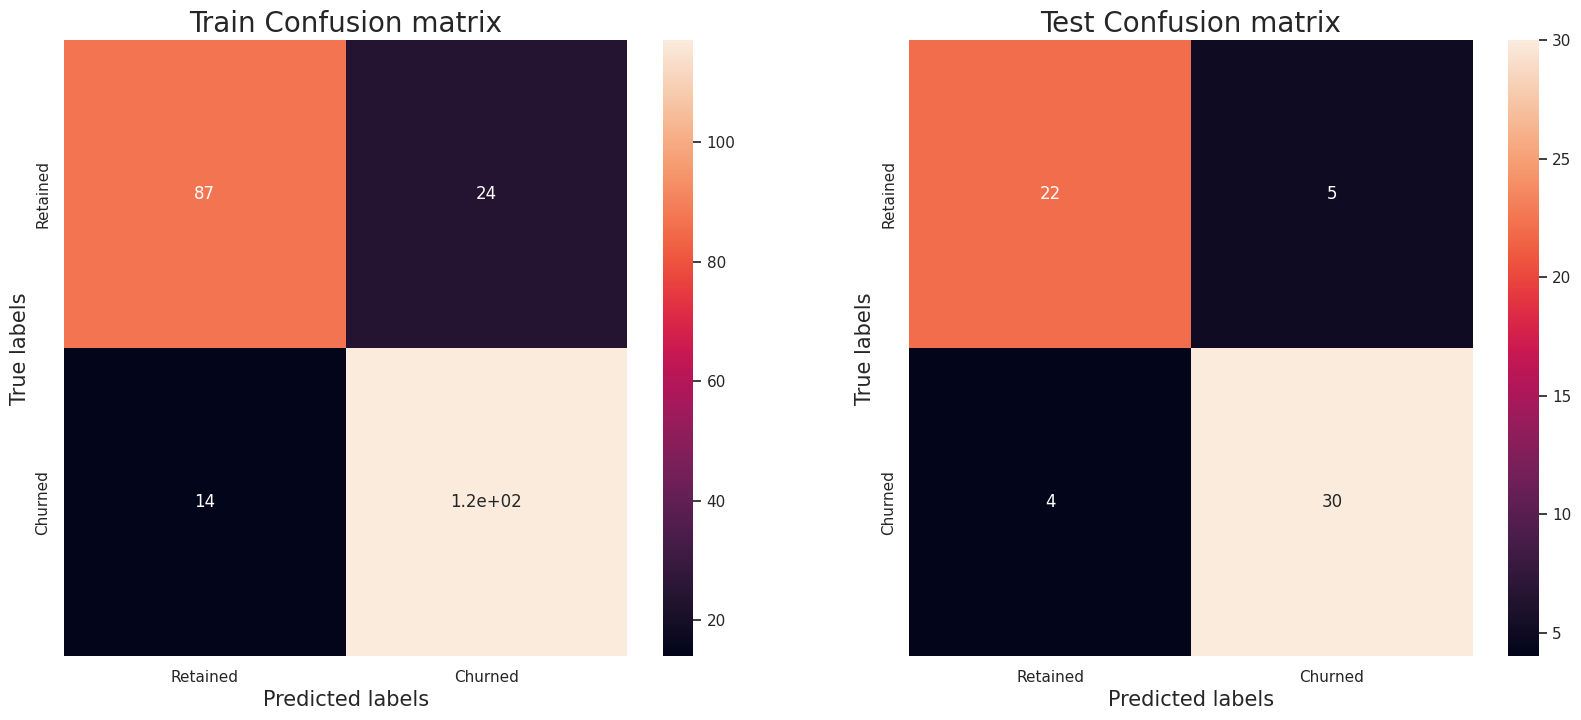

In [ ]:
labels = ['Retained','Churned']
cm3 = confusion_matrix(Y_train,traincv_class)
print(cm3,'\n')
cm4 = confusion_matrix(Y_test,testcv_class)
print(cm4)

plt.figure(figsize = (20,8))
ax = plt.subplot(1,2,1)
sns.heatmap(cm3,annot = True,ax = ax)
ax.set_xlabel('Predicted labels',fontsize = 15)
ax.set_ylabel('True labels',fontsize = 15)
ax.set_title('Train Confusion matrix',fontsize = 20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
ax = plt.subplot(1,2,2)
sns.heatmap(cm4,annot = True,ax = ax)
ax.set_xlabel('Predicted labels',fontsize = 15)
ax.set_ylabel('True labels',fontsize = 15)
ax.set_title('Test Confusion matrix',fontsize = 20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [ ]:
train_pred = pd.DataFrame({'CustID':Y_train.index,'Churn':Y_train.values,'Probability':traincv_preds,'Predicted':traincv_class})
train_pred.head()

,CustID,Churn,Probability,Predicted
0,74,1,0.985310,1
1,153,1,0.925029,1
2,64,1,0.906917,1
3,296,0,0.776430,1
4,287,0,0.680978,1


### Metrics Beyond Simple Accuracy

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision Score:',precision_score(Y_train,traincv_class,average = 'binary').round(4))
print('Recall Score:',recall_score(Y_train,traincv_class,average = 'binary').round(4))
print('F1 Score:',f1_score(Y_train,traincv_class,average = 'binary').round(4))

Precision Score: 0.8298
Recall Score: 0.8931
F1 Score: 0.8603


### ROC curve

In [ ]:
from sklearn import metrics
def ROC(actual,prob):
  fpr,tpr,thresholds =  metrics.roc_curve(actual,prob,drop_intermediate = False)
  auc_score = metrics.roc_auc_score(actual,prob)
  plt.figure(figsize = (10,8))
  plt.plot(fpr,tpr,label = 'ROC curve (area = %0.2f)' % auc_score)
  plt.plot([0,1],[0,1],'k--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.05])
  plt.xlabel('False Positive Rate or [1-True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Reciever Operator Characteristics example',fontsize = 20)
  plt.legend(loc = 'lower right')
  plt.show()

  return None

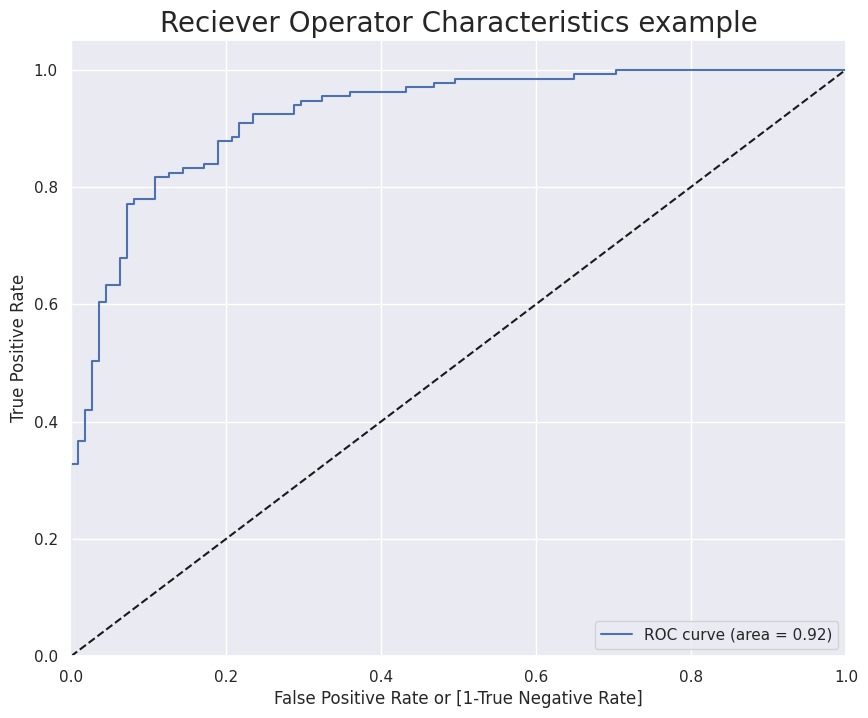

In [ ]:
ROC(Y_train,traincv_preds)

## Finding Optimal Cutoff point
**Optimal cutoff probability is that probability where we get balanced sensitivity and specificity**

In [ ]:
# Let's create a column with different probabilty cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
  train_pred[i] = train_pred['Probability'].map(lambda x:1 if x>i else 0)
train_pred.head()

,CustID,Churn,Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,74,1,0.985310,1,1,1,1,1,1,1,1,1,1,1
1,153,1,0.925029,1,1,1,1,1,1,1,1,1,1,1
2,64,1,0.906917,1,1,1,1,1,1,1,1,1,1,1
3,296,0,0.776430,1,1,1,1,1,1,1,1,1,0,0
4,287,0,0.680978,1,1,1,1,1,1,1,1,0,0,0


In [ ]:
# Calculating Accuracy,Specificity and Sensitivity for each cutoff
cutoff_df = pd.DataFrame(columns = ['Probability','Accuracy','Sensitivity','Specificity'])
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
  cm = confusion_matrix(train_pred['Churn'],train_pred[i])
  total = sum(sum(cm))
  accuracy = (cm[1,1]+cm[0,0])/total
  sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
  specificity = cm[0,0]/(cm[0,0]+cm[0,1])
  cutoff_df.loc[i] = [i,accuracy,sensitivity,specificity]
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.541322,1.000000,0.000000
0.1,0.1,0.764463,0.984733,0.504505
0.2,0.2,0.789256,0.961832,0.585586
0.3,0.3,0.826446,0.954198,0.675676
0.4,0.4,0.830579,0.938931,0.702703
0.5,0.5,0.842975,0.893130,0.783784
0.6,0.6,0.826446,0.839695,0.810811
0.7,0.7,0.842975,0.770992,0.927928
0.8,0.8,0.768595,0.610687,0.954955
0.9,0.9,0.677686,0.419847,0.981982


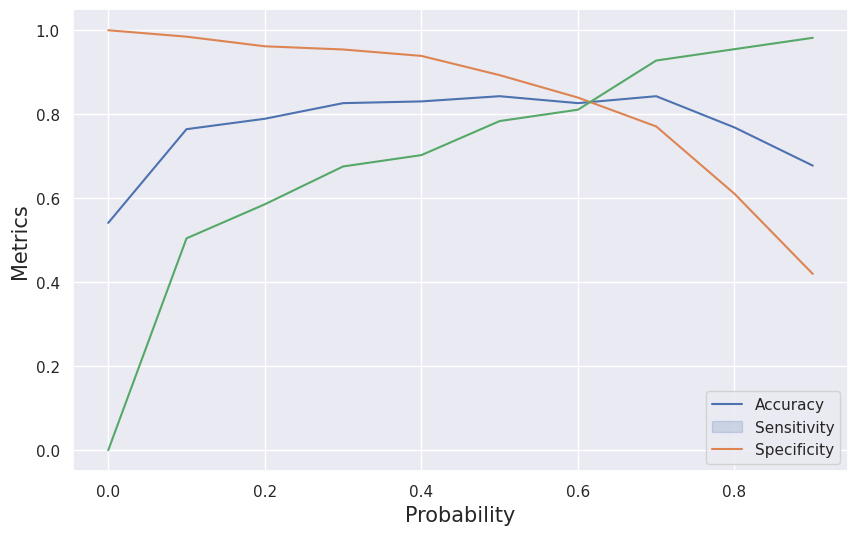

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize = (10,6))
sns.lineplot(data = cutoff_df,x = 'Probability', y = 'Accuracy')
sns.lineplot(data = cutoff_df,x = 'Probability', y = 'Sensitivity')
sns.lineplot(data = cutoff_df,x = 'Probability', y = 'Specificity')
plt.legend(['Accuracy','Sensitivity','Specificity'])
plt.xlabel('Probability',fontsize = 15)
plt.ylabel('Metrics',fontsize = 15)
plt.show()

**From the curve above, 0.6 is the optimum point to take it as a cutoff probability.**

In [ ]:
train_pred['Class'] = train_pred['Probability'].map(lambda x: 1 if x > 0.6 else 0)
train_pred.drop(numbers,axis = 1,inplace = True)
train_pred.head(6)

,CustID,Churn,Probability,Predicted,Class
0,74,1,0.985310,1,1
1,153,1,0.925029,1,1
2,64,1,0.906917,1,1
3,296,0,0.776430,1,1
4,287,0,0.680978,1,1
5,286,0,0.809749,1,1


In [ ]:
cm = confusion_matrix(train_pred.Churn,train_pred.Class)
cm

array([[ 90,  21],
       [ 21, 110]])

In [ ]:
Accuracy = accuracy_score(train_pred.Churn,train_pred.Class)
Recall = recall_score(train_pred.Churn,train_pred.Class)
Precision = precision_score(train_pred.Churn,train_pred.Class)

print('Accuracy:',round(Accuracy,4))
print('Precision:',round(Precision,4))
print('Recall:',round(Recall,4))

print('F1 Score:',f1_score(Y_train,traincv_class,average = 'binary').round(4))

Accuracy: 0.8264
Precision: 0.8397
Recall: 0.8397
F1 Score: 0.8603


## Precision Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve

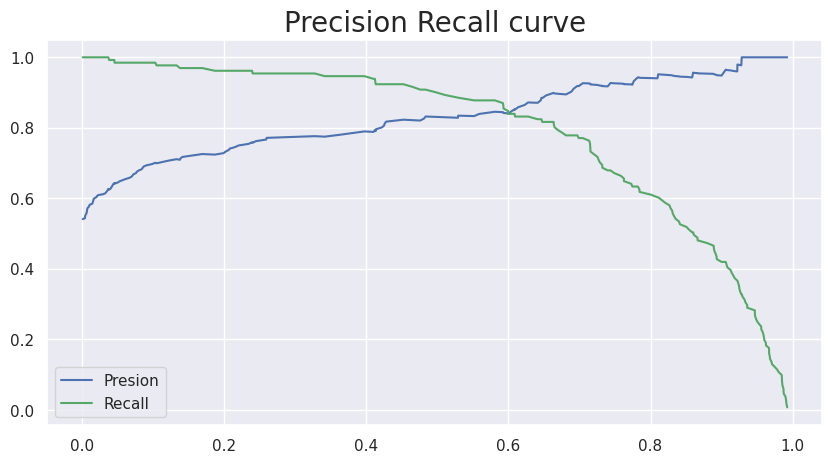

In [ ]:
p,r,thresholds = precision_recall_curve(train_pred.Churn,train_pred.Probability)
plt.figure(figsize = (10,5))
plt.plot(thresholds,p[:-1],'b-')
plt.plot(thresholds,r[:-1],'g-')
plt.legend(['Presion','Recall'])
plt.title('Precision Recall curve',fontsize = 20)
plt.show()


## Making Predictions on Test Set

In [ ]:
test_pred = pd.DataFrame({'CustID':Y_test.index,'Churn':Y_test.values,'Probability':testcv_preds,'Predicted':testcv_class})
test_pred.head()

,CustID,Churn,Probability,Predicted
0,225,0,0.044675,0
1,152,1,0.828842,1
2,228,0,0.836398,1
3,201,0,0.021379,0
4,52,1,0.102616,0


In [ ]:
test_pred['Class'] = test_pred.Probability.map(lambda x:1 if x > 0.6 else 0)
test_pred.head()

,CustID,Churn,Probability,Predicted,Class
0,225,0,0.044675,0,0
1,152,1,0.828842,1,1
2,228,0,0.836398,1,1
3,201,0,0.021379,0,0
4,52,1,0.102616,0,0


In [ ]:
cm_test = confusion_matrix(test_pred.Churn,test_pred.Class)
cm_test

array([[22,  5],
       [ 5, 29]])

In [ ]:
print('Test Accuracy Score:',accuracy_score(test_pred.Churn,test_pred.Class).round(4))
print('Test Precision Score:',precision_score(test_pred.Churn,test_pred.Class).round(4))
print('Test Sensisitivity/Recall Score:',recall_score(test_pred.Churn,test_pred.Class).round(4))
print('Test F1 Score:',f1_score(test_pred.Churn,test_pred.Class).round(4))

Test Accuracy Score: 0.8361
Test Precision Score: 0.8529
Test Sensisitivity/Recall Score: 0.8529
Test F1 Score: 0.8529
